The purpose of this notebook is to show with an example on a toy data , how to deal with unstructured data in the form of a english sentences . Here we are given data in the form of english sentences ; could be tweets , could be SMSes or emails . First we have to convert this into numeric form and also present it in a structured data before passing it on to ML algorithm . The main purpose is to design a classifier on tweets - positive tweet or negative tweet .

# Extracting features from Text

Field of Sentiment Analysis

# Bag of Words Representation 

In [4]:
X = ["Ayon Roy studies Bachelor Of Technology ",  
     "He is not pursuing Electronics & Communication Engineering" ,
     "A project on Artificial Intelligence is currently being undertaken by him",
     "Currently serving as an intern for API Development" ] 
     

In [3]:
len(X)


4

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [7]:
vectorizer.vocabulary_

{'ayon': 4,
 'roy': 24,
 'studies': 26,
 'bachelor': 5,
 'of': 20,
 'technology': 27,
 'he': 14,
 'is': 18,
 'not': 19,
 'pursuing': 23,
 'electronics': 11,
 'communication': 8,
 'engineering': 12,
 'project': 22,
 'on': 21,
 'artificial': 2,
 'intelligence': 16,
 'currently': 9,
 'being': 6,
 'undertaken': 28,
 'by': 7,
 'him': 15,
 'serving': 25,
 'as': 3,
 'an': 0,
 'intern': 17,
 'for': 13,
 'api': 1,
 'development': 10}

In [8]:
X_bag_of_words = vectorizer.transform(X)
X_bag_of_words   # 29 Unique words

<4x29 sparse matrix of type '<class 'numpy.int64'>'
	with 31 stored elements in Compressed Sparse Row format>

In [10]:
X_bag_of_words.shape  # 4 sentences , 29 words

(4, 29)

In [12]:
X_bag_of_words.toarray()  # Original Statement into Vectors

array([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0]], dtype=int64)

## Adding Stop Words ( Words which are not adding meaning to the sentences and removing them from vocabulary count )

In [14]:
my_list = ["is","of","and"] # list of stop words that I want

In [15]:
vectorizer = CountVectorizer(stop_words=my_list)
vectorizer.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['is', 'of', 'and'], strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [16]:
vectorizer.vocabulary_

{'ayon': 4,
 'roy': 22,
 'studies': 24,
 'bachelor': 5,
 'technology': 25,
 'he': 14,
 'not': 18,
 'pursuing': 21,
 'electronics': 11,
 'communication': 8,
 'engineering': 12,
 'project': 20,
 'on': 19,
 'artificial': 2,
 'intelligence': 16,
 'currently': 9,
 'being': 6,
 'undertaken': 26,
 'by': 7,
 'him': 15,
 'serving': 23,
 'as': 3,
 'an': 0,
 'intern': 17,
 'for': 13,
 'api': 1,
 'development': 10}

In [19]:
X_bag_of_words = vectorizer.transform(X)
print(X_bag_of_words.shape) # Words reduced to 27 from 29
X_bag_of_words.toarray()

(4, 27)


array([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0]], dtype=int64)

# Find Important Words in Text using TF-IDF

TF - IDF stands for Term Frequency , Inverse Document Frequency . It is a way to score the importance of words ( or terms ) in a document basedd on how frequently they appear across multiple documents .

- If a word appears frequently in a document , it\`s important . Give the word a high score .
- But if a word appears in many documents ,, it\`s not a unique identifier . Give the word a low score .

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer() 
tfidf_vectorizer.fit(X)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [28]:
import numpy as np
np.set_printoptions(precision=2) 
print(tfidf_vectorizer.transform(X).toarray()) 

[[0.   0.   0.   0.   0.41 0.41 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.41 0.   0.   0.   0.41 0.   0.41 0.41
  0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.39 0.   0.   0.39 0.39 0.
  0.39 0.   0.   0.   0.31 0.39 0.   0.   0.   0.39 0.   0.   0.   0.
  0.  ]
 [0.   0.   0.33 0.   0.   0.   0.33 0.33 0.   0.26 0.   0.   0.   0.
  0.   0.33 0.33 0.   0.26 0.   0.   0.33 0.33 0.   0.   0.   0.   0.
  0.33]
 [0.36 0.36 0.   0.36 0.   0.   0.   0.   0.   0.29 0.36 0.   0.   0.36
  0.   0.   0.   0.36 0.   0.   0.   0.   0.   0.   0.   0.36 0.   0.
  0.  ]]


# N Grams

It looks for sequence of tokens

In [30]:
Ngram_vectorizer = CountVectorizer(ngram_range=(2,3))
Ngram_vectorizer.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [31]:
Ngram_vectorizer.get_feature_names() 

['an intern',
 'an intern for',
 'api development',
 'artificial intelligence',
 'artificial intelligence is',
 'as an',
 'as an intern',
 'ayon roy',
 'ayon roy studies',
 'bachelor of',
 'bachelor of technology',
 'being undertaken',
 'being undertaken by',
 'by him',
 'communication engineering',
 'currently being',
 'currently being undertaken',
 'currently serving',
 'currently serving as',
 'electronics communication',
 'electronics communication engineering',
 'for api',
 'for api development',
 'he is',
 'he is not',
 'intelligence is',
 'intelligence is currently',
 'intern for',
 'intern for api',
 'is currently',
 'is currently being',
 'is not',
 'is not pursuing',
 'not pursuing',
 'not pursuing electronics',
 'of technology',
 'on artificial',
 'on artificial intelligence',
 'project on',
 'project on artificial',
 'pursuing electronics',
 'pursuing electronics communication',
 'roy studies',
 'roy studies bachelor',
 'serving as',
 'serving as an',
 'studies bachelor',
 

In [32]:
Ngram_vectorizer.transform(X).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0]], dtype=int64)

# Real World Application ( SMS Spam Data )

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("SMSSpamCollection",sep='\t',names=["label","message"])
df.head(20)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [35]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

## The Composition of the Dataset

Text(0.5,1,'SMS Spam Collection Data Set')

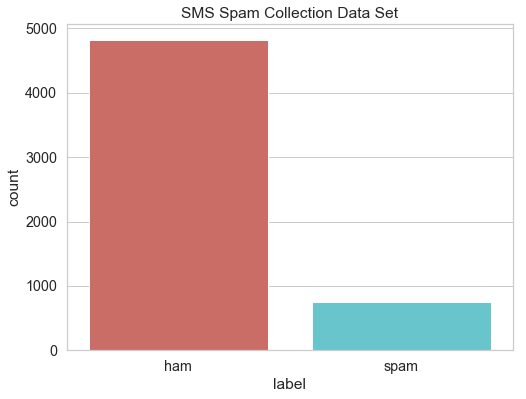

In [43]:
plt.figure(figsize=(8,6))
sns.set(style="whitegrid",font_scale=1.3)
ax = sns.countplot(x="label",data=df,palette="hls")
ax.set_title("SMS Spam Collection Data Set")

# Converting Text into Vectors

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(df["message"])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [53]:
vectorizer.vocabulary_

{'go': 3571,
 'until': 8084,
 'jurong': 4374,
 'point': 5958,
 'crazy': 2338,
 'available': 1316,
 'only': 5571,
 'in': 4114,
 'bugis': 1767,
 'great': 3655,
 'world': 8548,
 'la': 4501,
 'buffet': 1765,
 'cine': 2061,
 'there': 7694,
 'got': 3615,
 'amore': 1082,
 'wat': 8324,
 'ok': 5538,
 'lar': 4537,
 'joking': 4342,
 'wif': 8450,
 'oni': 5567,
 'free': 3373,
 'entry': 2963,
 'wkly': 8506,
 'comp': 2178,
 'to': 7806,
 'win': 8463,
 'fa': 3100,
 'cup': 2398,
 'final': 3221,
 'tkts': 7793,
 '21st': 412,
 'may': 4959,
 '2005': 403,
 'text': 7644,
 '87121': 794,
 'receive': 6340,
 'question': 6232,
 'std': 7279,
 'txt': 7986,
 'rate': 6284,
 'apply': 1169,
 '08452810075over18': 77,
 'dun': 2815,
 'say': 6679,
 'so': 7074,
 'early': 2836,
 'hor': 3952,
 'already': 1054,
 'then': 7688,
 'nah': 5270,
 'don': 2724,
 'think': 7709,
 'he': 3805,
 'goes': 3579,
 'usf': 8130,
 'lives': 4692,
 'around': 1220,
 'here': 3856,
 'though': 7729,
 'freemsg': 3380,
 'hey': 3866,
 'darling': 2455,
 'it

In [54]:
X_bag_of_words = vectorizer.transform(df["message"]) 
X_bag_of_words

<5572x8713 sparse matrix of type '<class 'numpy.int64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [59]:
X_bag_of_words.shape # 5572 SMSs , with 8713 Unique numbers

(5572, 8713)

In [56]:
X_bag_of_words.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [58]:
messages = df["message"][3]
print(messages)

U dun say so early hor... U c already then say...
